Задание 1.
Выберите датасет, который имеет отношение к вашей области интересов или исследований. 
Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

In [3]:
# Импортируем библиотеки для скачивания с сайта Kaggle
from pathlib import Path
import opendatasets as od
# Импортируем библиотеки для работы с датасетом
import pandas as pd
import numpy as np
# Импортируем библиотеки для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Скачиваем дата сет с сайта Kaggle
dataset_path = Path('house-prices')
if not dataset_path.is_file():
    od.download('https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


100%|██████████| 8.56k/8.56k [00:00<00:00, 2.92MB/s]

Для начала выполним обработку DataSet

In [51]:
# Добавляем файл датасет в DataFrame pandas
df = pd.read_csv('C:\\Users\\Esdesu\\Desktop\\JreJre\\Сбор и разметка данных\\HomeWork\\Work#9\\heart-failure-prediction\\heart.csv')

In [52]:
# Анализируем данные
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [53]:
# Для дальнейшей работы приводим название колонок к нижнему регистру
df.columns = df.columns.str.lower()

In [54]:
# Обработка для столбца Age: age of the patient(Возраст пациента)
df['age'].info() # Определяем тип данных, количество значений
df['age'].unique() # Поиск уникальных значений

<class 'pandas.core.series.Series'>
RangeIndex: 918 entries, 0 to 917
Series name: age
Non-Null Count  Dtype
--------------  -----
918 non-null    int64
dtypes: int64(1)
memory usage: 7.3 KB


array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71],
      dtype=int64)

In [55]:
# Обработка для столбца Sex: sex of the patient(Пол пациента)
df['sex'].info() # Определяем тип данных, количество значений
df['sex'].unique() # Поиск уникальных значений

<class 'pandas.core.series.Series'>
RangeIndex: 918 entries, 0 to 917
Series name: sex
Non-Null Count  Dtype 
--------------  ----- 
918 non-null    object
dtypes: object(1)
memory usage: 7.3+ KB


array(['M', 'F'], dtype=object)

In [56]:
# Обработка для столбца ChestPainType: chest pain type(Тип боли в груди)
df['chestpaintype'].info() # Определяем тип данных, количество значений
df['chestpaintype'].unique() # Поиск уникальных значений

<class 'pandas.core.series.Series'>
RangeIndex: 918 entries, 0 to 917
Series name: chestpaintype
Non-Null Count  Dtype 
--------------  ----- 
918 non-null    object
dtypes: object(1)
memory usage: 7.3+ KB


array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [57]:
# Обработка для столбца RestingBP: resting blood pressure(Артериальное давление в состоянии покоя)
df['restingbp'].info() # Определяем тип данных, количество значений
df['restingbp'].unique() # Поиск уникальных значений

<class 'pandas.core.series.Series'>
RangeIndex: 918 entries, 0 to 917
Series name: restingbp
Non-Null Count  Dtype
--------------  -----
918 non-null    int64
dtypes: int64(1)
memory usage: 7.3 KB


array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116,   0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123,
       102,  96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192,
       129, 164], dtype=int64)

In [58]:
# Смотрим значения переменной
df['restingbp'].describe().round(2)

count    918.00
mean     132.40
std       18.51
min        0.00
25%      120.00
50%      130.00
75%      140.00
max      200.00
Name: restingbp, dtype: float64

Обнаруженно одно 0, после анализа была принято решение привести значение к немного выше минимального.

In [59]:
# Сначала находим минимальное значение, исключая нули
min_value = df['restingbp'][df['restingbp'] > 0].min()
# Затем заменяем нулевые значения на значение чуть выше минимального
df['restingbp'] = df['restingbp'].replace(0, min_value * 1.01)

In [60]:
# Смотрим значения переменной
df['restingbp'].describe().round(2)

count    918.00
mean     132.48
std       18.07
min       80.00
25%      120.00
50%      130.00
75%      140.00
max      200.00
Name: restingbp, dtype: float64

In [61]:
# Обработка для столбца Cholesterol: serum cholesterol(Холестерин)
df['cholesterol'].info() # Определяем тип данных, количество значений
df['cholesterol'].unique() # Поиск уникальных значений

<class 'pandas.core.series.Series'>
RangeIndex: 918 entries, 0 to 917
Series name: cholesterol
Non-Null Count  Dtype
--------------  -----
918 non-null    int64
dtypes: int64(1)
memory usage: 7.3 KB


array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181,   0, 236, 203, 153, 316, 311, 252,
       458, 384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 12

In [62]:
# Смотрим значения переменной
df['cholesterol'].describe().round(2)

count    918.00
mean     198.80
std      109.38
min        0.00
25%      173.25
50%      223.00
75%      267.00
max      603.00
Name: cholesterol, dtype: float64

Обнаруженно множество пустых данных 0, после анализа была принято решение заполнить данными немного выше среднего.

In [63]:
# Заполняем пустые значения средними значениями
df['cholesterol'] = df['cholesterol'].replace(0, df['cholesterol'].quantile(0.9))
# Проверяем
df['cholesterol'].unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181, 236, 203, 153, 316, 311, 252, 458,
       384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 123, 17

In [64]:
# Смотрим значения переменной
df['cholesterol'].describe().round(2)

count    918.00
mean     255.95
std       58.29
min       85.00
25%      214.00
50%      254.00
75%      305.00
max      603.00
Name: cholesterol, dtype: float64

In [65]:
# Обработка для столбца FastingBS: fasting blood sugar(Уровень сахара в крови натощак(Диабет))
df['fastingbs'].info() # Определяем тип данных, количество значений
df['fastingbs'].unique() # Поиск уникальных значений

<class 'pandas.core.series.Series'>
RangeIndex: 918 entries, 0 to 917
Series name: fastingbs
Non-Null Count  Dtype
--------------  -----
918 non-null    int64
dtypes: int64(1)
memory usage: 7.3 KB


array([0, 1], dtype=int64)

In [66]:
# Обработка для столбца RestingECG: resting electrocardiogram results(Результаты электрокардиограммы покоя)
df['restingecg'].info() # Определяем тип данных, количество значений
df['restingecg'].unique() # Поиск уникальных значений

<class 'pandas.core.series.Series'>
RangeIndex: 918 entries, 0 to 917
Series name: restingecg
Non-Null Count  Dtype 
--------------  ----- 
918 non-null    object
dtypes: object(1)
memory usage: 7.3+ KB


array(['Normal', 'ST', 'LVH'], dtype=object)

In [67]:
# Обработка для столбца MaxHR: maximum heart rate achieved(Максимальная частота пульса)
df['maxhr'].info() # Определяем тип данных, количество значений
df['maxhr'].unique() # Поиск уникальных значений

<class 'pandas.core.series.Series'>
RangeIndex: 918 entries, 0 to 917
Series name: maxhr
Non-Null Count  Dtype
--------------  -----
918 non-null    int64
dtypes: int64(1)
memory usage: 7.3 KB


array([172, 156,  98, 108, 122, 170, 142, 130, 120,  99, 145, 140, 137,
       150, 166, 165, 125, 160, 164, 138, 178, 112, 118, 127, 114, 154,
       155,  87, 148, 100, 168, 184, 121, 153, 134,  96, 174, 175, 144,
        82, 135, 115, 128, 116,  94, 110,  92, 180, 152, 124, 106, 185,
       139, 190, 146, 158, 132, 176, 119, 188, 162, 105,  90, 136, 167,
       129, 102, 143, 103,  91, 126,  93, 131, 149, 123, 182, 141,  77,
       109, 133, 179, 113, 104,  95,  72,  97, 117,  86,  63, 157,  83,
        60,  70, 163,  67,  78,  84, 111,  80, 107, 161,  69,  88,  73,
       159, 151, 181, 186, 177, 173, 169, 171, 147,  71, 192, 195, 194,
       187, 202], dtype=int64)

In [68]:
# Обработка для столбца ExerciseAngina: exercise-induced angina(Стенокардия, вызванная физической нагрузкой)
df['exerciseangina'].info() # Определяем тип данных, количество значений
df['exerciseangina'].unique() # Поиск уникальных значений

<class 'pandas.core.series.Series'>
RangeIndex: 918 entries, 0 to 917
Series name: exerciseangina
Non-Null Count  Dtype 
--------------  ----- 
918 non-null    object
dtypes: object(1)
memory usage: 7.3+ KB


array(['N', 'Y'], dtype=object)

In [69]:
# Обработка для столбца Oldpeak
df['oldpeak'].info() # Определяем тип данных, количество значений
df['oldpeak'].unique() # Поиск уникальных значений

<class 'pandas.core.series.Series'>
RangeIndex: 918 entries, 0 to 917
Series name: oldpeak
Non-Null Count  Dtype  
--------------  -----  
918 non-null    float64
dtypes: float64(1)
memory usage: 7.3 KB


array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [70]:
# Обработка для столбца ST_Slope: the slope of the peak exercise ST segment(Наклон пикового сегмента ST при нагрузке)
df['st_slope'].info() # Определяем тип данных, количество значений
df['st_slope'].unique() # Поиск уникальных значений

<class 'pandas.core.series.Series'>
RangeIndex: 918 entries, 0 to 917
Series name: st_slope
Non-Null Count  Dtype 
--------------  ----- 
918 non-null    object
dtypes: object(1)
memory usage: 7.3+ KB


array(['Up', 'Flat', 'Down'], dtype=object)

In [71]:
# Обработка для столбца HeartDisease(Болезнь сердца)
df['heartdisease'].info() # Определяем тип данных, количество значений
df['heartdisease'].unique() # Поиск уникальных значений

<class 'pandas.core.series.Series'>
RangeIndex: 918 entries, 0 to 917
Series name: heartdisease
Non-Null Count  Dtype
--------------  -----
918 non-null    int64
dtypes: int64(1)
memory usage: 7.3 KB


array([0, 1], dtype=int64)

In [72]:
# Анализируем типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    object 
 2   chestpaintype   918 non-null    object 
 3   restingbp       918 non-null    float64
 4   cholesterol     918 non-null    int64  
 5   fastingbs       918 non-null    int64  
 6   restingecg      918 non-null    object 
 7   maxhr           918 non-null    int64  
 8   exerciseangina  918 non-null    object 
 9   oldpeak         918 non-null    float64
 10  st_slope        918 non-null    object 
 11  heartdisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


Dataset Description

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

Описание набора данных

1. Возраст: возраст пациента [лет]
2. Пол: пол пациента [М: Мужчина, Ж: Женщина]
3. ChestPainType: тип боли в груди [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: неангинальная боль, ASY: бессимптомная]
4. RestingBP: артериальное давление в состоянии покоя [мм рт. ст.]
5. Холестерин: холестерин сыворотки [мм/дл]
6. FastingBS: уровень сахара в крови натощак [1: если FastingBS > 120 мг/дл, 0: в противном случае]
7. ЭКГ покоя: результаты электрокардиограммы покоя [Нормальный: нормальный, ST: наличие аномалий ST-T (инверсия зубца T и/или подъем или депрессия ST > 0,05 мВ), ГЛЖ: вероятная или определенная гипертрофия левого желудочка по критериям Эстеса ]
8. MaxHR: достигнутая максимальная частота пульса [числовое значение от 60 до 202]
9. Стенокардия при физической нагрузке: стенокардия, вызванная физической нагрузкой [Д: Да, Н: Нет]
10. Oldpeak: oldpeak = ST [числовое значение, измеренное в депрессии]
11. ST_Slope: наклон пикового сегмента ST при нагрузке [Вверх: наклон вверх, Плоский: плоский, Вниз: наклон вниз]
12. HeartDisease: выходной класс [1: заболевание сердца, 0: нормальное]

Данный DataSet представляет собой сбор данных сердечно-сосудистых заболеваний. Разработываемая модель должна анализировать данные и сама определять риск заболевания, для пациента на основе собраных данных исследований.

Задание 2.
Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. 
Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

In [73]:
# Для удобства разделим DataSet на два для разметки автоматически 95% и вручную 5%
# Импорт модуля библиотеки для разделения df
from sklearn.model_selection import train_test_split

df_auto, df_manual = train_test_split(df, test_size=0.05, random_state=42)

In [83]:
def risk_disease(row, age, chestpaintype, fastingbs, st_slope, heartdisease):
    if (row[age] >= 28 and row[age] <= 50) and row[chestpaintype] == 'ASY' and row[st_slope] == 'Up' and row[heartdisease] != 1:
        return 'BA' # Risk Disease Below Average
    elif (row[age] >= 28 and row[age] <= 50) and row[chestpaintype] == 'ASY' and row[st_slope] == 'Flat' and row[heartdisease] != 1:
        return 'H' # Risk Disease High
    elif (row[age] >= 28 and row[age] <= 50) and row[chestpaintype] == 'ASY' and row[st_slope] == 'Down' and row[heartdisease] != 1:
        return 'VH' # Risk Disease Very High
    elif (row[age] >= 28 and row[age] <= 50) and row[chestpaintype] == 'NAP' and row[st_slope] == 'Up' and row[heartdisease] != 1:
        return 'M' # Risk Disease Minimal
    elif (row[age] >= 28 and row[age] <= 50) and row[chestpaintype] == 'NAP' and row[st_slope] == 'Flat' and row[heartdisease] != 1:
        return 'A' # Risk Disease Average
    elif (row[age] >= 28 and row[age] <= 50) and row[chestpaintype] == 'NAP' and row[fastingbs] != 1 and row[st_slope] == 'Down' and row[heartdisease] != 1:
        return 'M' # Risk Disease Minimal
    elif (row[age] >= 28 and row[age] <= 50) and row[chestpaintype] == 'ATA' and row[st_slope] == 'Up' and row[heartdisease] != 1:
        return 'VM' # Risk Disease Very Minimal
    elif (row[age] >= 28 and row[age] <= 50) and row[chestpaintype] == 'ATA' and row[st_slope] == 'Flat' and row[heartdisease] != 1:
        return 'BA' # Risk Disease Below Average
    elif (row[age] >= 28 and row[age] <= 50) and row[chestpaintype] == 'ATA' and row[st_slope] == 'Down' and row[heartdisease] != 1:
        return 'VH' # Risk Disease Very High
    elif (row[age] >= 28 and row[age] <= 50) and row[chestpaintype] == 'TA' and row[st_slope] == 'Up' and row[heartdisease] != 1:
        return 'VM' # Risk Disease Very Minimal
    elif (row[age] >= 28 and row[age] <= 50) and row[chestpaintype] == 'TA' and row[st_slope] == 'Flat' and row[heartdisease] != 1:
        return 'VH' # Risk Disease Very High 
    elif (row[age] >= 51 and row[age] <= 77) and row[chestpaintype] == 'ASY' and row[st_slope] == 'Up' and row[heartdisease] != 1:
        return 'A' # Risk Disease Average
    elif (row[age] >= 51 and row[age] <= 77) and row[chestpaintype] == 'ASY' and row[st_slope] == 'Flat' and row[heartdisease] != 1:
        return 'H' # Risk Disease Hing
    elif (row[age] >= 51 and row[age] <= 77) and row[chestpaintype] == 'ASY' and row[st_slope] == 'Down' and row[heartdisease] != 1:
        return 'VH' # Risk Disease Very High
    elif (row[age] >= 51 and row[age] <= 77) and row[chestpaintype] == 'NAP' and row[st_slope] == 'Up' and row[heartdisease] != 1:
        return 'VM' # Risk Disease Very Minimal
    elif (row[age] >= 51 and row[age] <= 77) and row[chestpaintype] == 'NAP' and row[st_slope] == 'Flat' and row[heartdisease] != 1:
        return 'M' # Risk Disease Minimal
    elif (row[age] >= 51 and row[age] <= 77) and row[chestpaintype] == 'NAP' and row[st_slope] == 'Down' and row[heartdisease] != 1:
        return 'H' # Risk Disease Hing
    elif (row[age] >= 51 and row[age] <= 77) and row[chestpaintype] == 'ATA' and row[st_slope] == 'Up' and row[heartdisease] != 1:
        return 'VM' # Risk Disease Very Minimal
    elif (row[age] >= 51 and row[age] <= 77) and row[chestpaintype] == 'ATA' and row[st_slope] == 'Flat' and row[heartdisease] != 1:
        return 'AA' # Risk Above Average
    elif (row[age] >= 51 and row[age] <= 77) and row[chestpaintype] == 'ATA' and row[st_slope] == 'Down' and row[heartdisease] != 1:
        return 'VM' # Risk Disease Very Minimal
    elif (row[age] >= 51 and row[age] <= 77) and row[chestpaintype] == 'TA' and row[st_slope] == 'Up' and row[heartdisease] != 1:
        return 'VM' # Risk Disease Very Minimal
    elif (row[age] >= 51 and row[age] <= 77) and row[chestpaintype] == 'TA' and row[st_slope] == 'Flat' and row[heartdisease] != 1:
        return 'A' # Risk Disease Average
    elif (row[age] >= 51 and row[age] <= 77) and row[chestpaintype] == 'TA' and row[st_slope] == 'Down' and row[heartdisease] != 1:
        return 'VM' # Risk Disease Very Minimal
    else:
        return 'HD' # Heart Disease

df_auto['risk_disease'] = df_auto.apply(lambda row: risk_disease(row, 'age', 'chestpaintype', 'fastingbs', 'st_slope', 'heartdisease'), axis = 1)

In [87]:
df_auto.head(33)

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease,risk_disease
250,44,M,ASY,135.0,491,0,Normal,135,N,0.0,Flat,1,HD
752,56,M,ASY,125.0,249,1,LVH,144,Y,1.2,Flat,1,HD
350,53,M,ASY,120.0,305,1,Normal,120,N,0.0,Flat,1,HD
758,51,M,TA,125.0,213,0,LVH,125,Y,1.4,Up,0,VM
759,54,M,ATA,192.0,283,0,LVH,195,N,0.0,Up,1,HD
107,34,M,ATA,150.0,214,0,ST,168,N,0.0,Up,0,VM
445,55,M,NAP,136.0,228,0,ST,124,Y,1.6,Flat,1,HD
141,50,M,ASY,140.0,341,0,ST,125,Y,2.5,Flat,1,HD
650,48,M,ASY,130.0,256,1,LVH,150,Y,0.0,Up,1,HD
544,61,F,ATA,140.0,298,1,Normal,120,Y,0.0,Up,0,VM


In [88]:
# Проверяем тип и заполнение
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 872 entries, 250 to 102
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             872 non-null    int64  
 1   sex             872 non-null    object 
 2   chestpaintype   872 non-null    object 
 3   restingbp       872 non-null    float64
 4   cholesterol     872 non-null    int64  
 5   fastingbs       872 non-null    int64  
 6   restingecg      872 non-null    object 
 7   maxhr           872 non-null    int64  
 8   exerciseangina  872 non-null    object 
 9   oldpeak         872 non-null    float64
 10  st_slope        872 non-null    object 
 11  heartdisease    872 non-null    int64  
 12  risk_disease    872 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 95.4+ KB


Задача 3.
Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

In [95]:
# Сохраним версию для ручной разметки и проверим коректность сохранения
df_manual.to_csv('df_manual.csv', index=False)
df_ls = pd.read_csv('df_manual.csv', engine='python', encoding='utf-8')
df_ls.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,63,F,ATA,140.0,195,0,Normal,179,N,0.0,Up,0
1,53,M,NAP,145.0,518,0,Normal,130,N,0.0,Flat,1
2,65,M,ASY,160.0,305,1,ST,122,N,1.2,Flat,1
3,56,M,ASY,130.0,305,0,LVH,122,Y,1.0,Flat,1
4,54,M,ATA,108.0,309,0,Normal,156,N,0.0,Up,0


In [96]:
df_ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46 non-null     int64  
 1   sex             46 non-null     object 
 2   chestpaintype   46 non-null     object 
 3   restingbp       46 non-null     float64
 4   cholesterol     46 non-null     int64  
 5   fastingbs       46 non-null     int64  
 6   restingecg      46 non-null     object 
 7   maxhr           46 non-null     int64  
 8   exerciseangina  46 non-null     object 
 9   oldpeak         46 non-null     float64
 10  st_slope        46 non-null     object 
 11  heartdisease    46 non-null     int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 4.4+ KB


Запустим программу Label-Studio с консоли для ручной разметки данных, загрузим DataSet, произведём ручную разметку данных, сохраним DataSet сделаный в ручную и сделаем пару скриншотов проделанной работы.

In [112]:
# Загрузим обработанный вручную DataSet
df_new_ls = pd.read_csv('df_manual_done.csv', engine='python', encoding='utf-8')
df_new_ls.head()

,age,annotation_id,annotator,chestpaintype,cholesterol,created_at,exerciseangina,fastingbs,heartdisease,id,lead_time,maxhr,oldpeak,restingbp,restingecg,sentiment,sex,st_slope,updated_at
0,63,30,1,ATA,195,2024-07-07T14:45:38.633020Z,N,0,0,11021,50.327,179,0.0,140.0,Normal,VM,F,Up,2024-07-07T14:45:38.633020Z
1,53,5,1,NAP,518,2024-07-07T14:35:39.258090Z,N,0,1,11022,64.085,130,0.0,145.0,Normal,HD,M,Flat,2024-07-07T14:40:18.202062Z
2,65,6,1,ASY,305,2024-07-07T14:40:42.149235Z,N,1,1,11023,13.000,122,1.2,160.0,ST,HD,M,Flat,2024-07-07T14:40:42.149235Z
3,56,7,1,ASY,305,2024-07-07T14:40:53.929331Z,Y,0,1,11024,6.871,122,1.0,130.0,LVH,HD,M,Flat,2024-07-07T14:40:53.929331Z
4,54,31,1,ATA,309,2024-07-07T14:45:51.172330Z,N,0,0,11025,9.399,156,0.0,108.0,Normal,VM,M,Up,2024-07-07T14:45:51.172330Z


In [113]:
df_new_ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46 non-null     int64  
 1   annotation_id   46 non-null     int64  
 2   annotator       46 non-null     int64  
 3   chestpaintype   46 non-null     object 
 4   cholesterol     46 non-null     int64  
 5   created_at      46 non-null     object 
 6   exerciseangina  46 non-null     object 
 7   fastingbs       46 non-null     int64  
 8   heartdisease    46 non-null     int64  
 9   id              46 non-null     int64  
 10  lead_time       46 non-null     float64
 11  maxhr           46 non-null     int64  
 12  oldpeak         46 non-null     float64
 13  restingbp       46 non-null     float64
 14  restingecg      46 non-null     object 
 15  sentiment       46 non-null     object 
 16  sex             46 non-null     object 
 17  st_slope        46 non-null     objec

![Create Project](<image/Create Project.png>)

![Work in Project](<image/Work in Project .png>)

![Done Project](<image/Done Project.png>)

Задача 4.
Объедините данные, размеченные вручную, с данными, размеченными на основе правил. 
Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

In [114]:
# Поменяем столбцы местами для объединения Dataset
redefine = ['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs', 'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope', 'heartdisease', 'sentiment', 'id', 'updated_at', 'lead_time', 'created_at', 'annotator', 'annotation_id']
df_edit = df_new_ls[redefine]
df_edit.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease,sentiment,id,updated_at,lead_time,created_at,annotator,annotation_id
0,63,F,ATA,140.0,195,0,Normal,179,N,0.0,Up,0,VM,11021,2024-07-07T14:45:38.633020Z,50.327,2024-07-07T14:45:38.633020Z,1,30
1,53,M,NAP,145.0,518,0,Normal,130,N,0.0,Flat,1,HD,11022,2024-07-07T14:40:18.202062Z,64.085,2024-07-07T14:35:39.258090Z,1,5
2,65,M,ASY,160.0,305,1,ST,122,N,1.2,Flat,1,HD,11023,2024-07-07T14:40:42.149235Z,13.000,2024-07-07T14:40:42.149235Z,1,6
3,56,M,ASY,130.0,305,0,LVH,122,Y,1.0,Flat,1,HD,11024,2024-07-07T14:40:53.929331Z,6.871,2024-07-07T14:40:53.929331Z,1,7
4,54,M,ATA,108.0,309,0,Normal,156,N,0.0,Up,0,VM,11025,2024-07-07T14:45:51.172330Z,9.399,2024-07-07T14:45:51.172330Z,1,31


In [115]:
# Переименуем "sentiment" в "risk_disease" 
df_edit.rename(columns={'sentiment': 'risk_disease'}, inplace=True)

# Удалим не нужные столбцы
df_edit.drop('id', axis=1, inplace=True)
df_edit.drop('updated_at', axis=1, inplace=True)
df_edit.drop('lead_time', axis=1, inplace=True)
df_edit.drop('created_at', axis=1, inplace=True)
df_edit.drop('annotator', axis=1, inplace=True)
df_edit.drop('annotation_id', axis=1, inplace=True)

df_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46 non-null     int64  
 1   sex             46 non-null     object 
 2   chestpaintype   46 non-null     object 
 3   restingbp       46 non-null     float64
 4   cholesterol     46 non-null     int64  
 5   fastingbs       46 non-null     int64  
 6   restingecg      46 non-null     object 
 7   maxhr           46 non-null     int64  
 8   exerciseangina  46 non-null     object 
 9   oldpeak         46 non-null     float64
 10  st_slope        46 non-null     object 
 11  heartdisease    46 non-null     int64  
 12  risk_disease    46 non-null     object 
dtypes: float64(2), int64(5), object(6)
memory usage: 4.8+ KB


In [116]:
df_edit.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease,risk_disease
0,63,F,ATA,140.0,195,0,Normal,179,N,0.0,Up,0,VM
1,53,M,NAP,145.0,518,0,Normal,130,N,0.0,Flat,1,HD
2,65,M,ASY,160.0,305,1,ST,122,N,1.2,Flat,1,HD
3,56,M,ASY,130.0,305,0,LVH,122,Y,1.0,Flat,1,HD
4,54,M,ATA,108.0,309,0,Normal,156,N,0.0,Up,0,VM


In [119]:
# Объединяем два подмножества в один набор данных
final_df = pd.concat([df_auto, df_edit], ignore_index=True)

# Проверяем чтобы всё было на месте
final_df.info()

# Сохраняем объединенный набор данных в файл
final_df.to_csv('df_ready_to_learn.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             918 non-null    int64  
 1   sex             918 non-null    object 
 2   chestpaintype   918 non-null    object 
 3   restingbp       918 non-null    float64
 4   cholesterol     918 non-null    int64  
 5   fastingbs       918 non-null    int64  
 6   restingecg      918 non-null    object 
 7   maxhr           918 non-null    int64  
 8   exerciseangina  918 non-null    object 
 9   oldpeak         918 non-null    float64
 10  st_slope        918 non-null    object 
 11  heartdisease    918 non-null    int64  
 12  risk_disease    918 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 93.4+ KB


Задача 5.
Обучите модель машинного обучения, используя объединенный набор размеченных данных. 
Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

In [4]:
# Чтение подготовленого файла файла
df_learn = pd.read_csv('df_ready_to_learn.csv')
df_learn

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease,risk_disease
0,44,M,ASY,135.0,491,0,Normal,135,N,0.0,Flat,1,HD
1,56,M,ASY,125.0,249,1,LVH,144,Y,1.2,Flat,1,HD
2,53,M,ASY,120.0,305,1,Normal,120,N,0.0,Flat,1,HD
3,51,M,TA,125.0,213,0,LVH,125,Y,1.4,Up,0,VM
4,54,M,ATA,192.0,283,0,LVH,195,N,0.0,Up,1,HD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,44,M,ATA,150.0,288,0,Normal,150,Y,3.0,Flat,1,HD
914,76,M,NAP,104.0,113,0,LVH,120,N,3.5,Down,1,HD
915,53,M,NAP,130.0,246,1,LVH,173,N,0.0,Up,0,VM
916,60,F,NAP,120.0,178,1,Normal,96,N,0.0,Up,0,VM


In [5]:
# Подготовка данных для обучения
df_learn['chestpaintype'] = df_learn['chestpaintype'].replace({'ASY': 0, 'ATA': 1, 'NAP': 2, 'TA': 3})
df_learn['st_slope'] = df_learn['st_slope'].replace({'Down': 0, 'Flat': 1, 'Up': 2})
df_learn['risk_disease'] = df_learn['risk_disease'].replace({'A': 0, 'AA': 1, 'BA': 2, 'H': 3, 'HD': 4, 'M': 5, 'VH': 6, 'VM': 7})

C:\Users\Esdesu\AppData\Local\Temp\ipykernel_14852\1234410599.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_learn['chestpaintype'] = df_learn['chestpaintype'].replace({'ASY': 0, 'ATA': 1, 'NAP': 2, 'TA': 3})
C:\Users\Esdesu\AppData\Local\Temp\ipykernel_14852\1234410599.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_learn['st_slope'] = df_learn['st_slope'].replace({'Down': 0, 'Flat': 1, 'Up': 2})
C:\Users\Esdesu\AppData\Local\Temp\ipykernel_14852\1234410599.py:4: FutureWarning: Downcasting behavior in `replace` is 

In [17]:
# Импортируем модули для разделения модели и создания модели обучения, модель 1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Модель метки тестовая
X = df_learn[['age', 'chestpaintype', 'fastingbs', 'st_slope', 'heartdisease']].values
# Модель метки обучающая
y = df_learn['risk_disease'].values  

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализируем модель машинного обучения
model = LogisticRegression(max_iter=1000)

# Обучим модель на обучающем наборе
model.fit(X_train, y_train)

c:\Users\Esdesu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [34]:
# Импортируем модули для разделения модели и создания модели обучения, модель 2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import f1_score

# Модель метки тестовая
X = df_learn[['age', 'chestpaintype', 'fastingbs', 'st_slope', 'heartdisease']].values
# Модель метки обучающая
y = df_learn['risk_disease'].values  

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Sequential([
    Dense(10, input_dim=5, activation='relu'),
    Dense(10, activation='relu'),
    Dense(8, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

grapf = model.fit(X_train, y_train, epochs=75, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/75


c:\Users\Esdesu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.0033 - loss: 21.7279 - val_accuracy: 0.0109 - val_loss: 13.5382
Epoch 2/75
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0247 - loss: 11.4179 - val_accuracy: 0.0290 - val_loss: 6.5316
Epoch 3/75
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0541 - loss: 5.3295 - val_accuracy: 0.5725 - val_loss: 2.6497
Epoch 4/75
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5556 - loss: 2.7355 - val_accuracy: 0.5580 - val_loss: 2.2122
Epoch 5/75
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4364 - loss: 2.3275 - val_accuracy: 0.5725 - val_loss: 1.8307
Epoch 6/75
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5538 - loss: 1.8840 - val_accuracy: 0.5725 - val_loss: 1.5779
Epoch 7/75
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5398 - loss: 1.6673 - val_accuracy: 0.5725 - val_loss: 1.4375
Epoch 8/75
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5513 - loss: 1.5206 - val_accuracy: 0.5725 - val_loss: 1.3724

Задача 6.
Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. 
Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

In [31]:
# Оценка модели 1
from sklearn.metrics import accuracy_score, f1_score

# Предсказываем классы для тестового набора
y_test_predicted = model.predict(X_test)

# Оценка(вычесление) точности модели
accuracy = accuracy_score(y_test, y_test_predicted)

# Вычисляем F1-меру
f1 = f1_score(y_test, y_test_predicted, average='weighted')

print(f'Test Accuracy (Точность): {accuracy}')
print(f'F-score = {f1}')

Test Accuracy (Точность): 0.8804347826086957
F-score = 0.8526160932440378


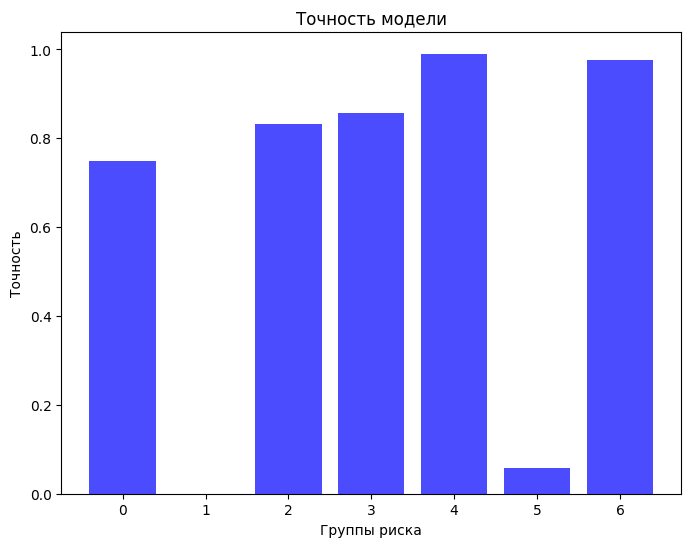

In [29]:
# График точности модели 1
from sklearn.metrics import confusion_matrix

# Предсказываем классы для тестового набора
y_pred_class = model.predict(X_test)

# Вычисляем матрицу ошибок
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Вычисляем точность для каждого класса
accuracy = np.diag(conf_matrix) / conf_matrix.sum(axis=1)

# Создаем график точности
plt.figure(figsize=(8, 6))
plt.bar(range(len(accuracy)), accuracy, color='blue', alpha=0.7)
plt.xlabel('Группы риска')
plt.ylabel('Точность')
plt.title('Точность модели')
plt.xticks(range(len(accuracy)))
plt.show()

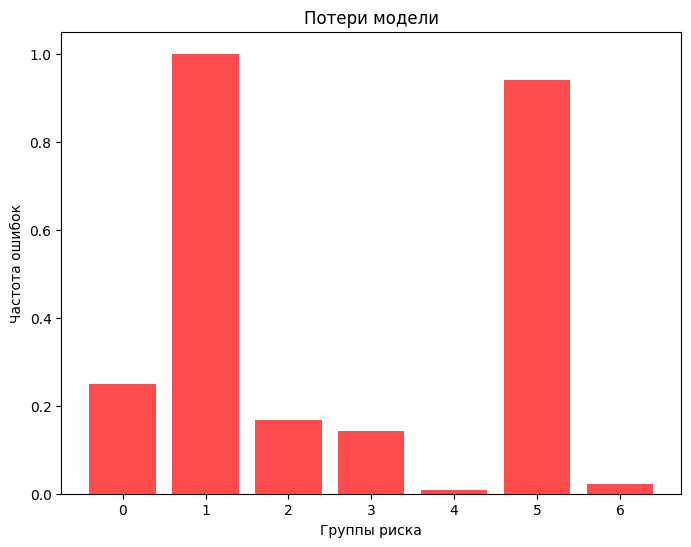

In [25]:
# График потери данных модели 1
# Предсказываем классы для тестового набора
y_pred_class = model.predict(X_test)

# Вычисляем матрицу ошибок
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Вычисляем ошибки для каждого класса
errors = conf_matrix.sum(axis=1) - np.diag(conf_matrix)

# Вычисляем частоту ошибок
error_rate = errors / conf_matrix.sum(axis=1)

# Создаем график ошибок
plt.figure(figsize=(8, 6))
plt.bar(range(len(error_rate)), error_rate, color='red', alpha=0.7)
plt.xlabel('Группы риска')
plt.ylabel('Частота ошибок')
plt.title('Потери модели')
plt.xticks(range(len(error_rate)))
plt.show()

In [38]:
# Оценка модели 2 
# Предсказываем классы для тестового набора
y_test_predicted = np.argmax(model.predict(X_test), axis=1)

# Оценка(вычесление) точности и потерь модели 
loss, accuracy = model.evaluate(X_test, y_test)

# Вычисляем F1-меру
f1 = f1_score(y_test, y_test_predicted, average='weighted')

print(f'Test Loss (Потери): {loss},\nTest Accuracy (Точность): {accuracy}')
print(f'F-score = {f1}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8283 - loss: 0.6415 
Test Loss (Потери): 0.7154940962791443,
Test Accuracy (Точность): 0.7862318754196167
F-score = 0.7083989366263614


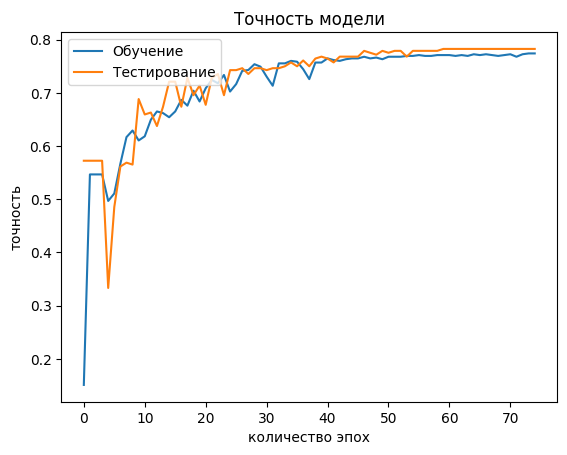

In [15]:
# График точности модели 2 
import matplotlib.pyplot as plt

plt.plot(grapf.history['accuracy'])
plt.plot(grapf.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['Обучение', 'Тестирование'], loc='upper left')
plt.show()

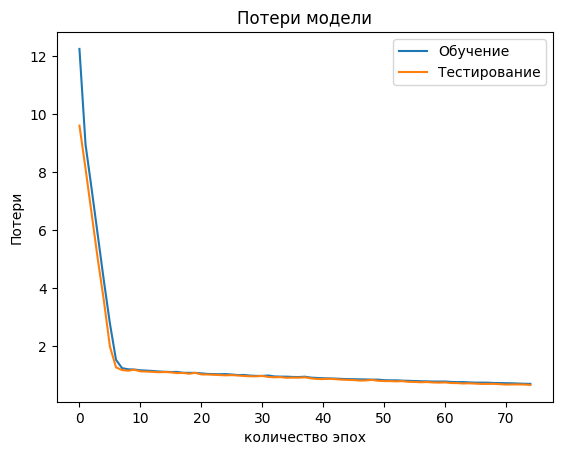

In [16]:
# График потери данных модели 2
plt.plot(grapf.history['loss'])
plt.plot(grapf.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['Обучение', 'Тестирование'], loc='upper right')
plt.show()

В итоге эффективность модели в решении задачи анализа данных определения риска сердечно сосудистых заболеваний работает с точностью 78% с моделью 2 и 88% с моделью 1, внезависимости от выбраной модели, точность можно считать приемлемой.